# **ALGORITMO WATERSHED**

## **Table of Contents**

1. [Ejemplo 1: Segmentación con monedas](#1)

    1.1.[Carga y visualización de imagen](#1.1)

    1.2.[Conversión a escalado a grises y aplicación de umbral](#1.2)

    1.3.[Eliminación de Ruido y Determinación de Áreas Seguras Mejoradas](#1.3)

    1.4.[Creación de Marcadores y Aplicación del Algoritmo Watershed](#1.4)

    1.5.[Conclusión](#1.5)

2. [Ejemplo 2: Detección de Manchas en la Piel con Watershed](#2)

    2.1.[Carga y Visualización de la Imagen](#2.1)

    2.2.[Conversión a Escala de Grises y Aplicación de Umbral](#2.2)

    2.3.[Eliminación de Ruido y Determinación de Áreas Seguras](#2.3)

    2.4.[Creación de Marcadores y Aplicación del Algoritmo Watershed](#2.4)

    2.5.[Conclusión](#2.5)

3. [Ejemplo 3: Limitaciones de Watershed en Imágenes de Nubes](#3)

    3.1.[Carga y Visualización de la Imagen](#3.1)

    3.2.[Conversión a Escala de Grises y Aplicación de Umbral](#3.2)

    3.3.[Aplicación del Algoritmo Watershed](#3.3)

    3.4.[¿Por qué Watershed Falla en este Caso?](#3.4)

4. [EJEMPLO 4: Watershed aplicado a las cuencas del Canal de Panamá](#4)

    4.1.[Conclusión](#4.1)

5. [EJEMPLO 5: Segmentación aplicado a plantas](#5)

    5.1.[Conclusión](#5.1)

6. [EJEMPLO 6: Segmentación en figuras geométricas](#6)

    6.1.[Conclusión](#6.1)

7. [EJEMPLO 7: Identificación de grano de arroz](#7)

    7.1[Conclusión](#7.1)

8. [EJEMPLO 8: Identificación de globulos blancos](#8)

    8.1[Conclusión](#8.1)

EQUIPO #5
+ Erick Eduardo Betancourt Del Ángel A01795545
+ Lineth Del Carmen Guerra Camarena A01795639
+ Jorge Steven Reyes Londono A01794421
+ Juan Ángel Fuentes Leon A01795431
+ Luis Alejandro Aguilar Díaz A01795362



# **Segmentación de Imágenes con Watershed**
El algoritmo **Watershed** es una técnica poderosa de segmentación de imágenes utilizada en diversas aplicaciones.

## **¿Qué es Watershed?**
Watershed trata la imagen como una topografía donde los niveles de intensidad representan elevaciones.  
El algoritmo expande regiones desde marcadores iniciales hasta alcanzar límites definidos por los bordes.

### **Aplicaciones Comunes de Watershed**
1. **Segmentación de objetos en imágenes médicas y biomédicas.**
2. **Análisis dermatológico para la detección de manchas en la piel.**
3. **Inspección industrial para detección de defectos.**
4. **Visión por computadora para separar elementos en imágenes complejas.**

Este notebook presenta dos aplicaciones prácticas del algoritmo Watershed:
- **Segmentación de objetos en imágenes generales.**
- **Detección de manchas en la piel.**

Cada sección explicará paso a paso el proceso de segmentación con ejemplos prácticos.


# **EJEMPLO 1:** Segmentación de Monedas con Watershed Mejorado<a class="anchor" id="1" ></a>
Este notebook aplica el algoritmo de segmentación **Watershed** con mejoras para mejorar la identificación del área segura del primer plano.

### **Mejoras Implementadas:**
- Uso de **filtros morfológicos avanzados** para mejorar la detección del primer plano.
- Ajuste en la **transformación de distancia** y el **umbral** para garantizar una mejor identificación.


## **1.1. Carga y Visualización de la Imagen** <a class="anchor" id="1.1" ></a>


### Explicación:
En este paso, se carga la imagen de objetos en imágenes generales con un fondo oscuro.  
El fondo oscuro ayuda a que el algoritmo Watershed distinga mejor las regiones de interés,  
ya que las objetos en imágenes generales tienen una intensidad mucho mayor que el fondo.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

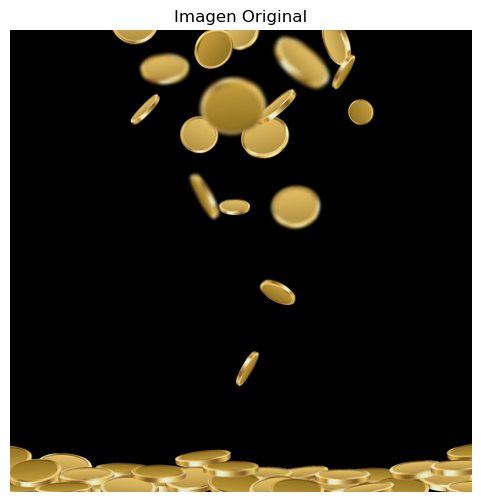

In [ ]:
# Cargar la imagen de prueba
image = cv2.imread('moneda.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente

# Mostrar la imagen original
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')
plt.show()


## **1.2. Conversión a Escala de Grises y Aplicación de Umbral** <a class="anchor" id="1.2" ></a>


### Explicación:
Se convierte la imagen a escala de grises para simplificar el análisis de intensidad.  
Luego, se aplica un umbral de Otsu para convertir la imagen en binaria.  
Este umbral **automáticamente separa las objetos en imágenes generales del fondo oscuro**, lo que mejora la segmentación.


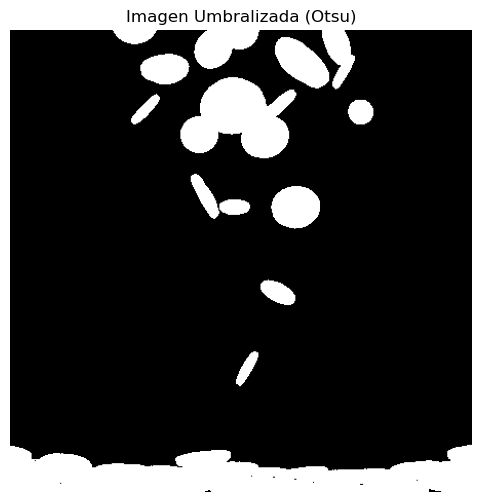

In [ ]:

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Aplicar umbral Otsu para segmentar las monedas del fondo
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen umbralizada
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Imagen Umbralizada (Otsu)')
plt.show()


## **1.3. Eliminación de Ruido y Determinación de Áreas Seguras Mejoradas** <a class="anchor" id="1.3" ></a>


### Explicación:
Este paso es crucial para evitar que el algoritmo Watershed divida incorrectamente las objetos en imágenes generales.  
- **Operación de apertura morfológica:** elimina pequeños ruidos en la imagen.  
- **Dilación:** expande las áreas blancas para asegurar que las objetos en imágenes generales sean detectadas completamente.  
- **Transformación de distancia:** calcula la distancia de cada píxel al fondo más cercano,  
  ayudando a identificar el centro de cada moneda.  
- **Umbral:** Se ajusta para evitar fragmentación incorrecta de las objetos en imágenes generales.


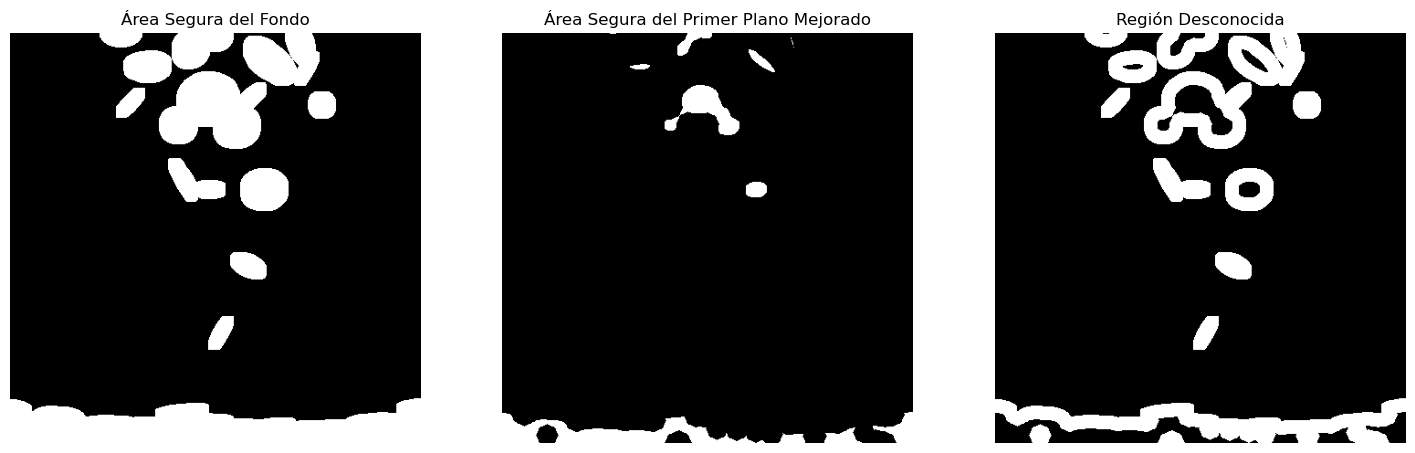

In [ ]:

# Definir un kernel para las operaciones morfológicas
kernel = np.ones((3,3), np.uint8)

# Aplicar apertura morfológica para eliminar ruido
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Determinar el área segura del fondo mediante dilatación
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Aplicar transformación de distancia con mejor visibilidad
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)

# Ajuste del umbral para mejorar la identificación del primer plano
_, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

# Convertir sure_fg a tipo de dato uint8
sure_fg = np.uint8(sure_fg)

# Determinar la región desconocida restando sure_fg de sure_bg
unknown = cv2.subtract(sure_bg, sure_fg)

# Mostrar las áreas seguras y la región desconocida
fig, axs = plt.subplots(1, 3, figsize=(18,6))
axs[0].imshow(sure_bg, cmap='gray')
axs[0].set_title('Área Segura del Fondo')
axs[0].axis('off')

axs[1].imshow(sure_fg, cmap='gray')
axs[1].set_title('Área Segura del Primer Plano Mejorado')
axs[1].axis('off')

axs[2].imshow(unknown, cmap='gray')
axs[2].set_title('Región Desconocida')
axs[2].axis('off')

plt.show()


## **1.4. Creación de Marcadores y Aplicación del Algoritmo Watershed** <a class="anchor" id="1.4" ></a>


### Explicación:
Aquí se crean los marcadores para Watershed:
- **Componentes conectados:** Cada región de objetos en imágenes generales obtiene una etiqueta única.  
- **Región desconocida:** Se identifican los bordes entre objetos en imágenes generales para evitar errores de segmentación.  
- **Aplicación de Watershed:** El algoritmo expande las regiones desde los marcadores iniciales  
  hasta cubrir completamente cada moneda sin mezclarlas con otras.


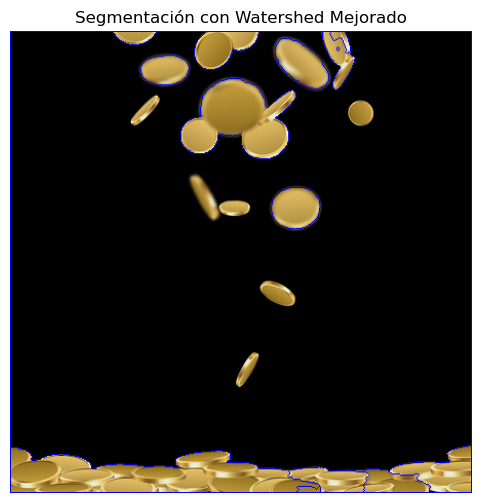

In [ ]:

# Etiquetar los componentes conectados en sure_fg
_, markers = cv2.connectedComponents(sure_fg)

# Sumar 1 a todos los marcadores para distinguir el fondo
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo Watershed
image_watershed = image.copy()
markers = cv2.watershed(image_watershed, markers)

# Dibujar los contornos en la imagen original
image_watershed[markers == -1] = [0, 0, 255]  # Bordes en azul

# Mostrar la imagen segmentada
plt.figure(figsize=(6,6))
plt.imshow(image_watershed)
plt.axis('off')
plt.title('Segmentación con Watershed Mejorado')
plt.show()



## **1.5. Conclusión** <a class="anchor" id="1.5" ></a>
Hemos mejorado la segmentación de células utilizando técnicas más precisas para definir el área segura del primer plano. Ahora, la segmentación es más robusta gracias a:
- **Mejor calibración del umbral en la transformación de distancia.**
- **Uso de filtrado morfológico avanzado.**
- **Mejor definición de áreas seguras antes de aplicar Watershed.**



### Explicación:
El algoritmo Watershed ha segmentado correctamente las objetos en imágenes generales del fondo oscuro.  
El éxito de la segmentación depende de:
- **La claridad del contraste entre objetos y fondo.**  
- **Un preprocesamiento adecuado para mejorar la detección de bordes y regiones seguras.**  
- **El ajuste correcto del umbral y la transformación de distancia.**  
Este método es útil en múltiples aplicaciones, desde visión industrial hasta análisis biomédico.



---

## **Ejemplo 2: Detección de Manchas en la Piel con Watershed** <a class="anchor" id="2" ></a>
Esta sección aplicará el mismo proceso de segmentación para detectar y analizar manchas en la piel.

La segmentación es una herramienta útil en **análisis dermatológico**, permitiendo la detección de lesiones, lunares o irregularidades cutáneas.



# **Detección de Manchas en la Piel con Watershed con Watershed**
Este notebook muestra cómo aplicar el algoritmo **Watershed** para la detección y segmentación de manchas en la piel en imágenes.

### **Diferencias clave respecto a segmentación en fondo oscuro:**
- Se invierte el umbral para detectar manchas en la piel como regiones oscuras en un fondo claro.
- Se ajustan los valores de la transformación de distancia y filtrado morfológico para evitar pérdida de información.

### **Pasos del proceso:**
1. **Cargar la imagen** y convertirla a escala de grises.
2. **Reducir ruido y mejorar contraste** con preprocesamiento.
3. Aplicar **operaciones morfológicas** para segmentar correctamente.
4. Utilizar **Watershed** para separar manchas en la piel individuales.


## **2.1. Carga y Visualización de la Imagen** <a class="anchor" id="2.1" ></a>

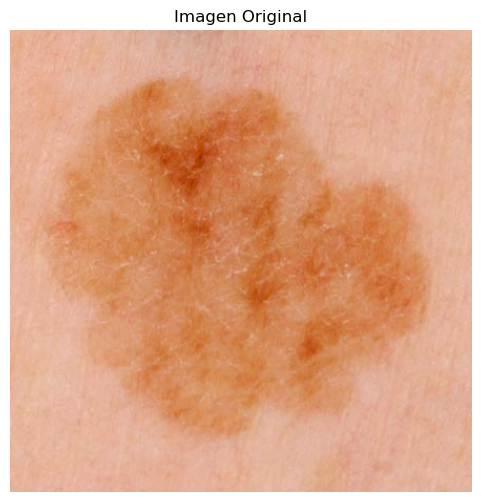

In [ ]:
# Cargar la imagen de células en fondo blanco (puedes cambiar 'cells.jpg' por la imagen correcta)
image = cv2.imread('piel.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización

# Mostrar la imagen original
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')
plt.show()


## **2.2. Conversión a Escala de Grises y Aplicación de Umbral** <a class="anchor" id="2.2" ></a>

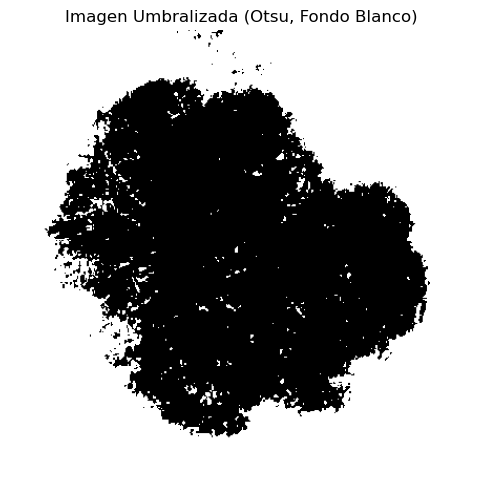

In [ ]:

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Aplicar umbral Otsu con inversión (para detectar células oscuras en fondo claro)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen umbralizada
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Imagen Umbralizada (Otsu, Fondo Blanco)')
plt.show()


## **2.3 Eliminación de Ruido y Determinación de Áreas Seguras** <a class="anchor" id="2.3" ></a>

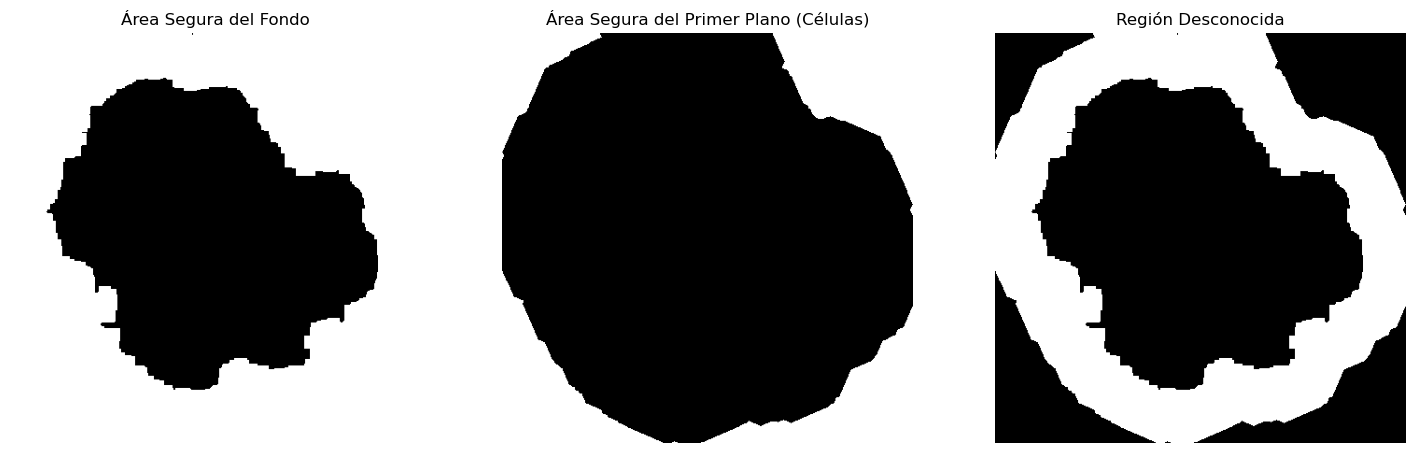

In [ ]:

# Definir un kernel para las operaciones morfológicas
kernel = np.ones((3,3), np.uint8)

# Aplicar apertura morfológica para eliminar ruido dentro de las células
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Determinar el área segura del fondo mediante dilatación
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Aplicar transformación de distancia para identificar el centro de cada célula
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
_, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

# Convertir sure_fg a tipo de dato uint8
sure_fg = np.uint8(sure_fg)

# Determinar la región desconocida restando sure_fg de sure_bg
unknown = cv2.subtract(sure_bg, sure_fg)

# Mostrar las áreas seguras y la región desconocida
fig, axs = plt.subplots(1, 3, figsize=(18,6))
axs[0].imshow(sure_bg, cmap='gray')
axs[0].set_title('Área Segura del Fondo')
axs[0].axis('off')

axs[1].imshow(sure_fg, cmap='gray')
axs[1].set_title('Área Segura del Primer Plano (Células)')
axs[1].axis('off')

axs[2].imshow(unknown, cmap='gray')
axs[2].set_title('Región Desconocida')
axs[2].axis('off')

plt.show()


## **2.4. Creación de Marcadores y Aplicación del Algoritmo Watershed** <a class="anchor" id="2.4" ></a>

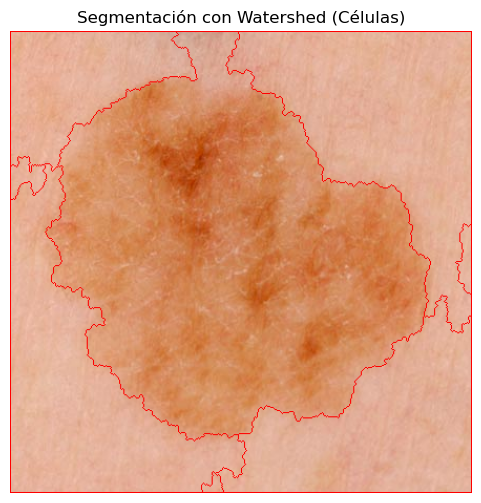

In [ ]:

# Etiquetar los componentes conectados en sure_fg
_, markers = cv2.connectedComponents(sure_fg)

# Sumar 1 a todos los marcadores para distinguir el fondo
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo Watershed
image_watershed = image.copy()
markers = cv2.watershed(image_watershed, markers)

# Dibujar los contornos en la imagen original (color verde para destacar células)
image_watershed[markers == -1] = [255, 0, 0]

# Mostrar la imagen segmentada
plt.figure(figsize=(6,6))
plt.imshow(image_watershed)
plt.axis('off')
plt.title('Segmentación con Watershed (Células)')
plt.show()



## **2.5. Conclusión** <a class="anchor" id="2.5" ></a>

Este notebook ha demostrado cómo usar el algoritmo **Watershed** para segmentar manchas en la piel en imágenes con fondo blanco.

### **Aspectos clave:**
- **El umbral se invierte** para detectar manchas en la piel oscuras sobre un fondo claro.
- **El filtrado morfológico mejora la separación** de manchas en la piel y elimina ruido.
- **El ajuste de la transformación de distancia** ayuda a identificar correctamente el centro de cada célula.
- **El algoritmo Watershed separa las manchas en la piel individuales**, evitando que se fusionen en una sola región.

Este método se usa ampliamente en análisis dermatológico para la detección de anomalías cutáneas en imágenes dermatológicas.


Hemos explorado el algoritmo Watershed en dos aplicaciones distintas:
1. **Segmentación de objetos en imágenes generales.**
2. **Detección de manchas en la piel para análisis dermatológico.**

El éxito del algoritmo depende de:
- **Una correcta presegmentación con umbralización y filtrado morfológico.**
- **Un buen ajuste en la transformación de distancia.**
- **Uso de marcadores bien definidos para evitar sobresegmentación.**

Watershed es una técnica versátil en el análisis de imágenes, aplicable a múltiples disciplinas.



---

# **Ejemplo 3: Limitaciones de Watershed en Imágenes de Nubes** <a class="anchor" id="3" ></a>
Si bien el algoritmo Watershed es muy útil en muchas aplicaciones, tiene dificultades en imágenes con **gradientes de intensidad suaves** o **bordes poco definidos**.

En este ejemplo, intentaremos segmentar una imagen de **nubes**. Debido a que las transiciones entre las nubes y el cielo son **graduales y difusas**, Watershed tendrá problemas para definir contornos claros y puede generar una segmentación incorrecta.


## **3.1. Carga y Visualización de la Imagen** <a class="anchor" id="3.1" ></a>

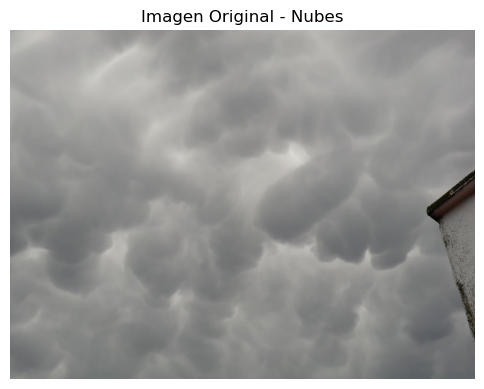

In [ ]:
# Cargar la imagen de nubes
image = cv2.imread('nubes.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización

# Mostrar la imagen original
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original - Nubes')
plt.show()


## **3.2. Conversión a Escala de Grises y Aplicación de Umbral** <a class="anchor" id="3.2" ></a>

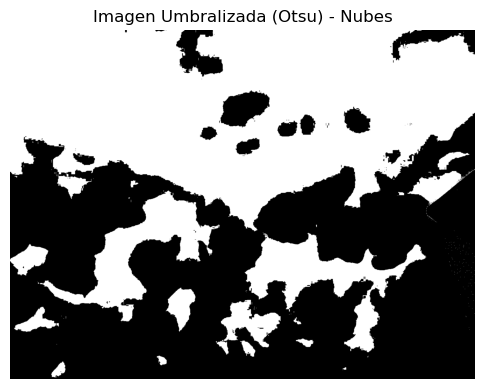

In [ ]:

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Aplicar umbral adaptativo (se prueba con Otsu, pero el resultado no será óptimo)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen umbralizada
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Imagen Umbralizada (Otsu) - Nubes')
plt.show()


## **3.3. Aplicación del Algoritmo Watershed** <a class="anchor" id="3.3" ></a>

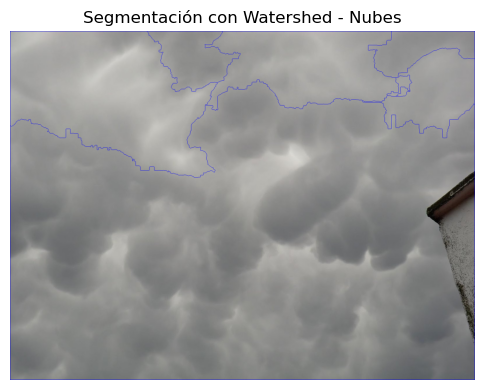

In [ ]:

# Definir un kernel para las operaciones morfológicas
kernel = np.ones((3,3), np.uint8)

# Aplicar apertura morfológica para eliminar ruido
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Determinar el área segura del fondo mediante dilatación
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Aplicar transformación de distancia para encontrar regiones de primer plano
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
_, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

# Convertir sure_fg a uint8
sure_fg = np.uint8(sure_fg)

# Determinar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar los componentes conectados en sure_fg
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Aplicar Watershed
image_watershed = image.copy()
markers = cv2.watershed(image_watershed, markers)

# Dibujar los contornos en la imagen original (en rojo para destacar errores)
image_watershed[markers == -1] = [0, 0, 255]

# Mostrar la imagen segmentada con Watershed
plt.figure(figsize=(6,6))
plt.imshow(image_watershed)
plt.axis('off')
plt.title('Segmentación con Watershed - Nubes')
plt.show()



## **3.4. ¿Por qué Watershed Falla en este Caso?** <a class="anchor" id="3.4" ></a>
Como se observa en la imagen segmentada, el algoritmo Watershed **no logra definir correctamente los contornos de las nubes**. Esto ocurre por varias razones:

1. **Las transiciones de intensidad son graduales.**  
   - Watershed necesita bordes bien definidos, pero en esta imagen no los hay.  
2. **El umbral Otsu no funciona bien en este caso.**  
   - Como el fondo del cielo no tiene una intensidad uniforme, el umbraliza mal las nubes.
3. **La segmentación se vuelve inconsistente.**  
   - Las nubes se dividen en muchas regiones pequeñas en lugar de segmentos completos.

### **¿Cómo se podría mejorar este resultado?**
- **Usar técnicas de aprendizaje profundo** como U-Net para segmentación más precisa.
- **Aplicar filtros adaptativos** para mejorar la detección de bordes antes de usar Watershed.
- **Usar clustering (K-means)** para agrupar regiones similares en lugar de Watershed.

Este ejemplo demuestra que Watershed **no es ideal para segmentar objetos con bordes difusos o gradientes suaves**.


---

# **EJEMPLO 4:** Watershed aplicado a las cuencas del Canal de Panamá <a class="anchor" id="4" ></a>

El Canal de Panamá depende del agua de lluvia que llena sus lagos como Gatún y Alhajuela para mover los barcos a través de las esclusas. Pero los eventos extremos del clima, como las sequías asociadas al fenómeno de El Niño, han reducido el nivel de los lagos, afectando la capacidad de tránsito y el suministro de agua potable.

El algoritmo Watershed toma su nombre de la idea geográfica de una cuenca hidrográfica: un área donde toda el agua converge hacia un mismo punto. Hoy este concepto digital puede ayudarnos a enfrentar una crisis muy real y física.

**Ventajas del código Watershed aplicado a cuencas**

1. Segmentación precisa
- Permite identificar regiones naturales en imágenes satelitales o aéreas.
- Utiliza la transformada de distancia para separar regiones que parecen un solo bloque.

2. Visualización clara
- Los contornos en rojo y más gruesos facilitan la interpretación visual, incluso para quienes no son expertos.

3. Basado en la topología de imagen
- El algoritmo se inspira en cómo fluye el agua, ideal para estudiar drenajes, subcuencas y cuencas reales.

Cada paso (umbral, dilatación, etiquetado) es visible y ajustable.
Se puede ajustar fácilmente para diferentes entornos o tipos de vegetación.

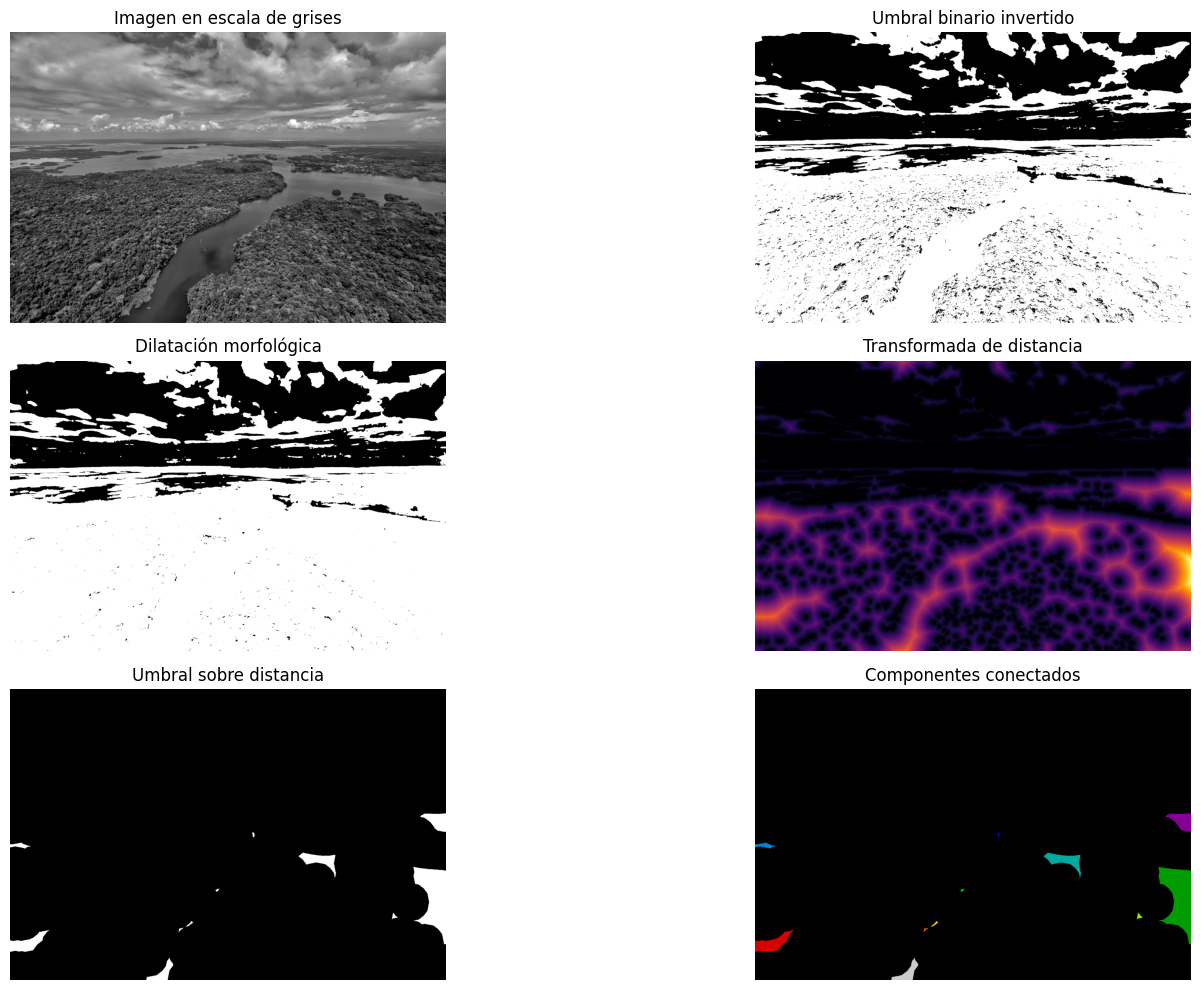

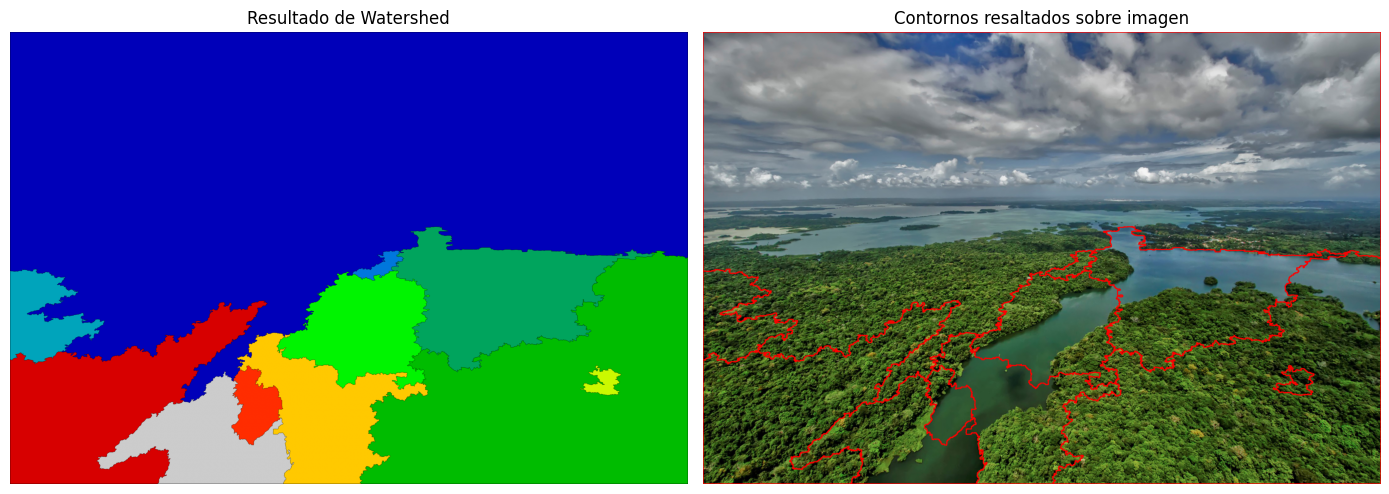

In [ ]:
def watershed():
    # Leer la imagen de la cuenca
    img = cv2.imread('data/cuenca-Panama.jpg')

    # Convertir a RGB para visualización
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Escala de grises
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Mostrar pasos intermedios
    plt.figure(figsize=(18, 10))

    # Escala de grises
    plt.subplot(321)
    plt.imshow(imgGray, cmap='gray')
    plt.title('Imagen en escala de grises')
    plt.axis('off')

    # Umbral binario inverso
    plt.subplot(322)
    _, imgThreshold = cv2.threshold(imgGray, 120, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(imgThreshold, cmap='gray')
    plt.title('Umbral binario invertido')
    plt.axis('off')

    # Dilatación
    plt.subplot(323)
    kernel = np.ones((3, 3), np.uint8)
    imgDilate = cv2.morphologyEx(imgThreshold, cv2.MORPH_DILATE, kernel, iterations=2)
    plt.imshow(imgDilate, cmap='gray')
    plt.title('Dilatación morfológica')
    plt.axis('off')

    # Transformada de distancia
    plt.subplot(324)
    disTrans = cv2.distanceTransform(imgDilate, cv2.DIST_L2, 5)
    plt.imshow(disTrans, cmap='inferno')
    plt.title('Transformada de distancia')
    plt.axis('off')

    # Umbral sobre transformada
    plt.subplot(325)
    _, distThresh = cv2.threshold(disTrans, 0.5 * disTrans.max(), 255, 0)
    plt.imshow(distThresh, cmap='gray')
    plt.title('Umbral sobre distancia')
    plt.axis('off')

    # Componentes conectados
    plt.subplot(326)
    distThresh = np.uint8(distThresh)
    _, labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title('Componentes conectados')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Aplicar watershed
    plt.figure(figsize=(14, 6))
    markers = cv2.watershed(img, np.int32(labels))

    # Crear una máscara para bordes
    borders = (markers == -1).astype(np.uint8) * 255

    # Engrosar contornos
    borders_dilated = cv2.dilate(borders, np.ones((3, 3), np.uint8), iterations=2)

    # Aplicar borde rojo a imgRGB
    imgRGB[borders_dilated == 255] = [255, 0, 0]  # rojo brillante

    # Mostrar resultado
    plt.subplot(121)
    plt.imshow(markers, cmap='nipy_spectral')
    plt.title('Resultado de Watershed')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(imgRGB)
    plt.title('Contornos resaltados sobre imagen')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    watershed()

# **4.1. Conclusión** <a class="anchor" id="c4" ></a>

La crisis de agua en el Canal de Panamá no es solo una advertencia local, sino un ejemplo mundial de cómo el manejo inteligente de las cuencas combinando ecología, tecnología y ciencia de datos será vital para la sostenibilidad.

La aplicación de la visión computacional en imagenes satelites como en el caso del Canal de Panamá ayudaría a agilizar procesos de exploración para abrir nuevas cuencas que abastescan de agua al canal y las comunidades cercanas que dependen del recurso hídrico.

**Aplicar técnicas como Watershed en imágenes aéreas o satelitales puede ayudar a:**
- Identificar nuevas microcuencas o zonas de drenaje natural.
- Monitorear cambios en el paisaje por deforestación o urbanización.
- Detectar zonas vulnerables donde el flujo de agua se interrumpe o no llega.
- Estimar la distribución del agua superficial en temporadas secas.

# **EJEMPLO 5:** Segmentación aplicado a plantas <a class="anchor" id="5" ></a>

En este caso el algoritmo de watershed simula cómo se llenan cuencas de agua en una imagen. Es ideal para separar objetos que están pegados entre sí, como ocurre con muchas plantas suculentas en una maceta o jardín.

En este experimento vamos a identificar y separar visualmente cada planta y sus contornos del fondo de otras plantas, creando una especie de máscara que define su forma.

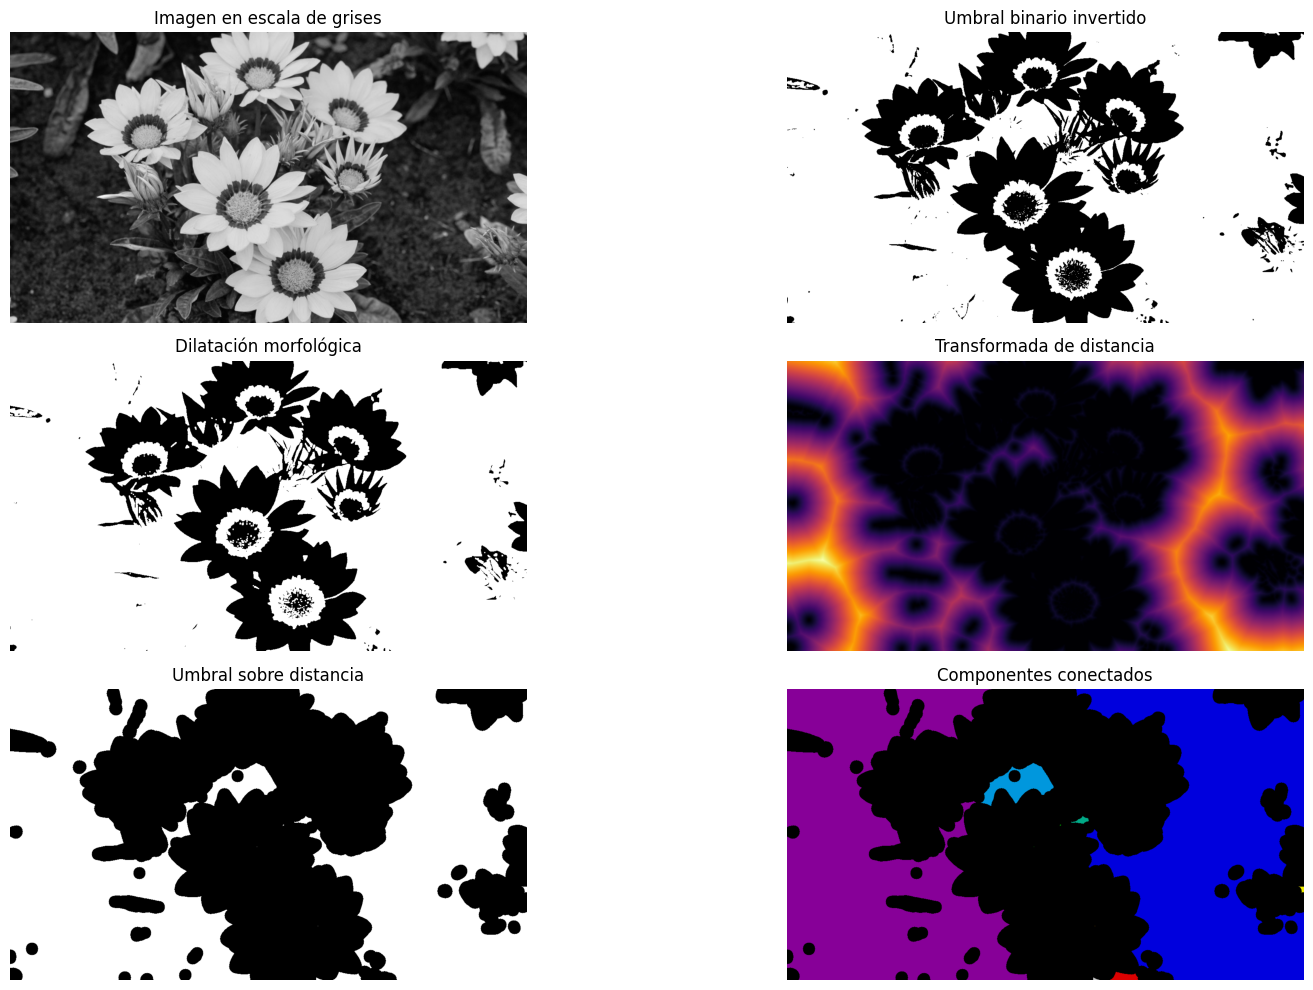

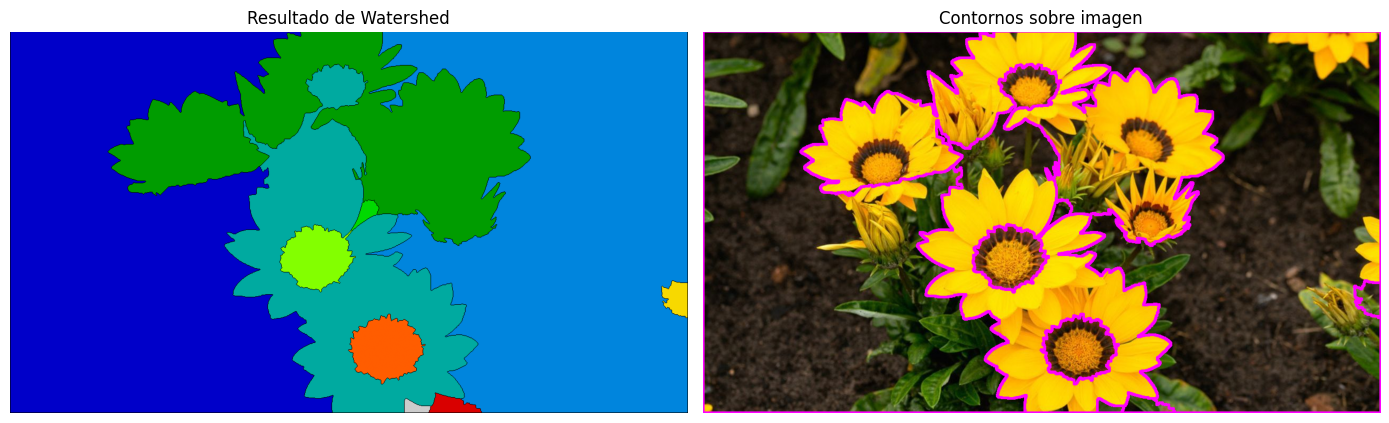

In [ ]:
def watershed():
    # Obtener el directorio actual y leer la imagen original
    root = os.getcwd()
    img = cv2.imread('data/plantas.jpg')

    # Convertir la imagen a RGB para visualización
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises para procesamiento
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Crear figura para mostrar resultados intermedios
    plt.figure(figsize=(18, 10))

    # Imagen original en escala de grises
    plt.subplot(321)
    plt.imshow(imgGray, cmap='gray')
    plt.title('Imagen en escala de grises')
    plt.axis('off')

    # Umbral binario invertido
    plt.subplot(322)
    _, imgThreshold = cv2.threshold(imgGray, 120, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(imgThreshold, cmap='gray')
    plt.title('Umbral binario invertido')
    plt.axis('off')

    # Dilatación para cerrar huecos
    plt.subplot(323)
    kernel = np.ones((3, 3), np.uint8)
    imgDilate = cv2.morphologyEx(imgThreshold, cv2.MORPH_DILATE, kernel)
    plt.imshow(imgDilate, cmap='gray')
    plt.title('Dilatación morfológica')
    plt.axis('off')

    # Transformada de distancia
    plt.subplot(324)
    disTrans = cv2.distanceTransform(imgDilate, cv2.DIST_L2, 5)
    plt.imshow(disTrans, cmap='inferno')
    plt.title('Transformada de distancia')
    plt.axis('off')

    # Umbral sobre la transformada de distancia
    plt.subplot(325)
    _, distThresh = cv2.threshold(disTrans, 15, 255, cv2.THRESH_BINARY)
    plt.imshow(distThresh, cmap='gray')
    plt.title('Umbral sobre distancia')
    plt.axis('off')

    # Etiquetado de componentes conectados
    plt.subplot(326)
    distThresh = np.uint8(distThresh)
    _, labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title('Componentes conectados')
    plt.axis('off')

    # Mostrar todos los pasos anteriores
    plt.tight_layout()
    plt.show()

    # Aplicar watershed y mostrar resultados finales
    plt.figure(figsize=(14, 6))

    # Aplicar algoritmo de Watershed
    labels = np.int32(labels)
    markers = cv2.watershed(imgRGB.copy(), labels)

    # Mostrar etiquetas generadas por watershed
    plt.subplot(121)
    plt.imshow(markers, cmap='nipy_spectral')
    plt.title('Resultado de Watershed')
    plt.axis('off')

    # Dibujar contornos de las cuencas (líneas rojas)
    # Crear máscara de bordes
    border_mask = np.uint8(markers == -1) * 255

    # Dilatar la máscara para engrosar los bordes
    kernel = np.ones((5, 5), np.uint8)  # Puedes probar (5,5) si quieres más grosor
    border_mask_dilated = cv2.dilate(border_mask, kernel, iterations=1)

    # Superponer la máscara dilatada en rojo sobre la imagen
    imgRGB[border_mask_dilated == 255] = (255, 0, 255)
    plt.subplot(122)
    plt.imshow(imgRGB)
    plt.title('Contornos sobre imagen')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    watershed()

# **5.1. Conclusión** <a class="anchor" id="5.1" ></a>

En imágenes densas, donde las hojas se tocan y todo parece una sola masa verde, Watershed nos da ojos topográficos. Nos permite ver dónde termina una planta y comienza otra, como si leyéramos el mapa de una selva desde el cielo.

Se calculó qué tan lejos está cada píxel del borde más cercano. El centro de cada planta tendrá valores altos, y los bordes valores bajos.Esto permite encontrar el "corazón" de cada planta.

Watershed simula que el agua brota desde cada marcador y se expande. Cuando dos "aguas" se encuentran, se forma una línea divisoria, que es el contorno entre plantas. El algoritmo define esas líneas como bordes (-1)

Finalmente, esos bordes se pintan (por ejemplo, en magenta) sobre la imagen original. Lo que queda dentro de cada contorno es la silueta segmentada de cada planta.


# **EJEMPLO 6:** Segmentación en figuras geométricas <a class="anchor" id="6" ></a>

Esta técnica es especialmente útil para separar objetos que se tocan o se superponen, como ocurre con muchas plantas suculentas en una maceta o jardín.

El objetivo del código es identificar y separar visualmente cada uno de los objetos (simulados mediante círculos) y resaltar sus contornos.


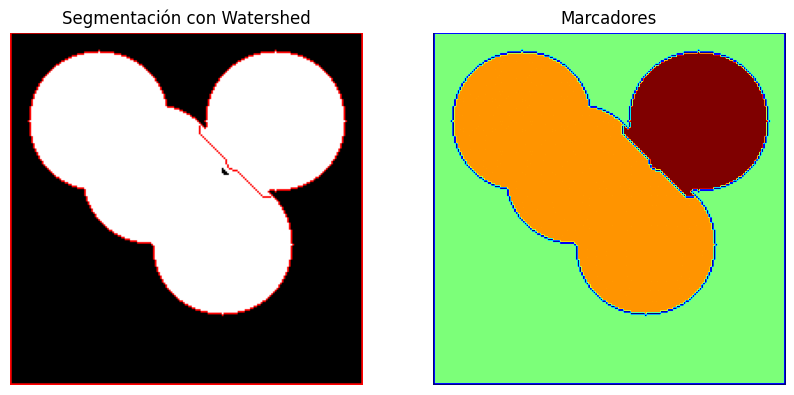

In [ ]:
imagen = np.zeros((200, 200, 3), dtype=np.uint8)
cv2.circle(imagen, (50, 50), 40, (255, 255, 255), -1)
cv2.circle(imagen, (80, 80), 40, (255, 255, 255), -1)
cv2.circle(imagen, (120, 120), 40, (255, 255, 255), -1)
cv2.circle(imagen, (150, 50), 40, (255, 255, 255), -1)

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
_, umbral = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
apertura = cv2.morphologyEx(umbral, cv2.MORPH_OPEN, kernel, iterations=2)

fondo_seguro = cv2.dilate(apertura, kernel, iterations=3)

dist_transform = cv2.distanceTransform(apertura, cv2.DIST_L2, 5)
_, frente_seguro = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
frente_seguro = np.uint8(frente_seguro)

desconocido = cv2.subtract(fondo_seguro, frente_seguro)


_, marcadores = cv2.connectedComponents(frente_seguro)
marcadores = marcadores + 1
marcadores[desconocido == 255] = 0
marcadores = cv2.watershed(imagen, marcadores)
imagen[marcadores == -1] = [0, 0, 255]


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Segmentación con Watershed')
plt.axis('off')

plt.subplot(122)
plt.imshow(marcadores, cmap='jet')
plt.title('Marcadores')
plt.axis('off')

plt.show()

# **6.1.Conclusión** <a class="anchor" id="6.1" ></a>

Este ejercicio demuestra de manera efectiva cómo el algoritmo de Watershed puede separar objetos contiguos en una imagen. La técnica es muy útil en aplicaciones de procesamiento y análisis de imágenes, ya que ofrece una solución robusta para segmentar elementos adyacentes y facilitar su posterior análisis o reconocimiento.

En resumen, el código ilustra una aplicación práctica del algoritmo Watershed, resaltando su capacidad para extraer y segmentar objetos complejos, lo que lo hace ideal para tareas de análisis en imágenes con objetos que se tocan o están muy próximos.

# **EJEMPLO 7:** Identificación de grano de arroz <a class="anchor" id="7" ></a>

En este ejemplo se utiliza el algoritmo de Watershed para segmentar los granos de arroz en una imagen real. La técnica de Watershed, permite separar objetos que se tocan o se superponen, facilitando la identificación y el análisis individual de cada grano.


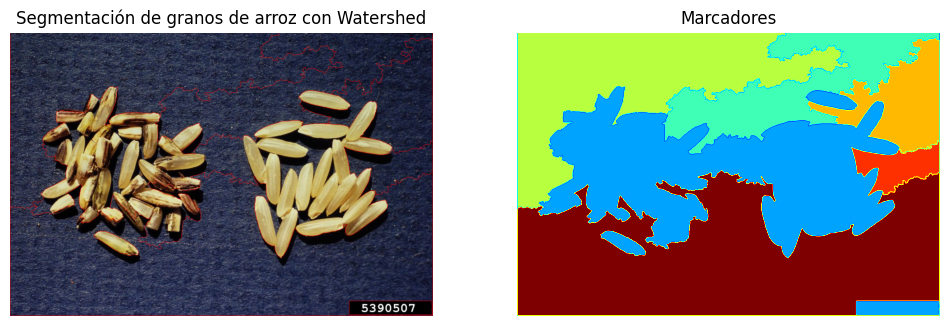

In [ ]:
imagen = cv2.imread('rice_kernels.jpg')
if imagen is None:
    print("Error: no se pudo cargar la imagen. Verifica que 'rice_kernels.jpg' esté en el directorio correcto.")
    exit()

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbral = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
apertura = cv2.morphologyEx(umbral, cv2.MORPH_OPEN, kernel, iterations=2)

fondo_seguro = cv2.dilate(apertura, kernel, iterations=3)

dist_transform = cv2.distanceTransform(apertura, cv2.DIST_L2, 5)
_, frente_seguro = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
frente_seguro = np.uint8(frente_seguro)
desconocido = cv2.subtract(fondo_seguro, frente_seguro)
_, marcadores = cv2.connectedComponents(frente_seguro)
marcadores = marcadores + 1
marcadores[desconocido == 255] = 0
marcadores = cv2.watershed(imagen, marcadores)
imagen[marcadores == -1] = [0, 0, 255]

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Segmentación de granos de arroz con Watershed')
plt.axis('off')

plt.subplot(122)
plt.imshow(marcadores, cmap='jet')
plt.title('Marcadores')
plt.axis('off')

plt.show()

# **7.1.Conclusión** <a class="anchor" id="7.1" ></a>

Este ejercicio demuestra cómo el algoritmo de Watershed puede aplicarse efectivamente para segmentar granos de arroz en una imagen real. Al utilizar técnicas de preprocesamiento como la conversión a escala de grises, umbralización invertida con Otsu, y operaciones morfológicas, se preparan las bases para una segmentación precisa. La transformada de distancia y la identificación de regiones seguras permiten definir marcadores confiables, los cuales son fundamentales para que Watershed separe correctamente cada grano, incluso en casos de superposición o contacto. En definitiva, este método es muy útil en aplicaciones de análisis de imágenes en el campo de la agricultura o la industria alimentaria, facilitando la identificación y cuantificación de granos de arroz de manera automatizada.

# **EJEMPLO 8:** Identificación de globulos blancos <a class="anchor" id="7" ></a>

Este ejemplo se utiliza el algoritmo de watershed para la identificacion de los diferentes tipos de globulos blancos asi como cierta anomalías que se generan en celulas dañadas

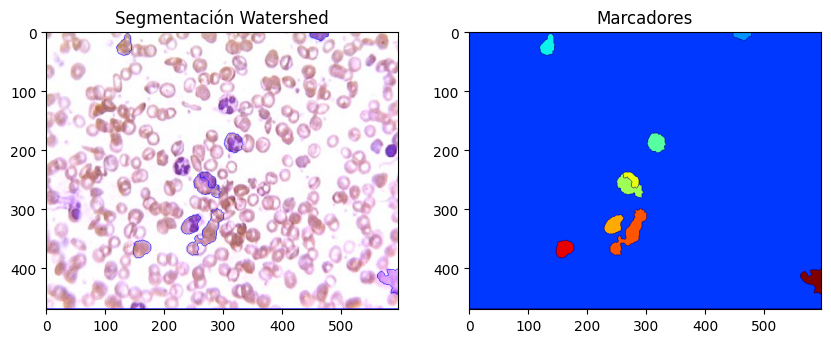

In [ ]:
# Cargar la imagen en escala de grises
image = cv2.imread('white_cells2.jpg')  # Cambia la ruta a tu imagen
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar un filtro de desenfoque para reducir el ruido
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Aplicar umbralización para obtener una imagen binaria
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar operaciones morfológicas para eliminar ruido
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Obtener la región de fondo segura
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Obtener la región de primer plano segura
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Obtener los bordes inciertos
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetado de marcadores para la segmentación
_, markers = cv2.connectedComponents(sure_fg)

# Sumar 1 a los marcadores para que la región desconocida sea 0
markers = markers + 1
markers[unknown == 255] = 0

# Aplicar el algoritmo Watershed
cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Los contornos se marcan en azul

# Mostrar la imagen segmentada
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Segmentación Watershed')
plt.subplot(1,2,2), plt.imshow(markers, cmap='jet'), plt.title('Marcadores')
plt.show()

# **8.1.Conclusión** <a class="anchor" id="8.1" ></a>
Este ejercicio nos demuestra como al utilizar umbralización Otsu, algunas operaciones morfológicas y posteriormente el método de Watershed podemos identificar los glóbulos blancos dentro de una muestra microscópica de sangre enferma. Al mismo tiempo podemos observar que se generan anomalías en los glóbulos rojos dañados los cuales debido a la diferencia de contraste se generan como áreas independientes. Este método se utiliza en varias aplicaciones médicas pero requiere aplicar operaciones previas específicas dependiendo del objetivo de la prueba solicitada.